In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.stats import zscore
import seaborn as sns

In [2]:
stud=pd.read_csv('student.csv')

In [3]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   rollno   10 non-null     int64
 1   maths    10 non-null     int64
 2   science  10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


In [4]:
stud.head()

,rollno,maths,science
0,1,80,75
1,2,75,85
2,3,42,43
3,4,95,80
4,5,39,34


In [5]:
stud_no_roll=stud.drop('rollno', axis=1)

In [7]:
stud_no_roll.head()

,maths,science
0,80,75
1,75,85
2,42,43
3,95,80
4,39,34


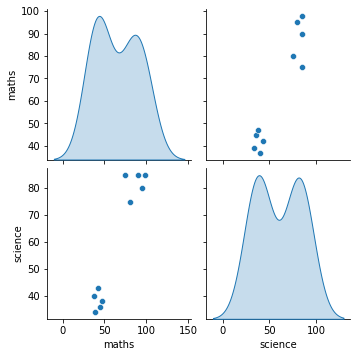

In [8]:
sns.pairplot(stud_no_roll, diag_kind="kde")

In [10]:
from scipy.spatial.distance import cdist
clusters=range(1,5)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(stud_no_roll)
    prediction=model.predict(stud_no_roll)
    print(prediction)
    meanDistortions.append(model.inertia_)#(sum(np.min(cdist(tech_sup,model.cluster_centers_))))

[0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 1 1 1 0 1 0]
[2 2 0 1 0 0 0 1 0 1]
[3 2 1 0 1 1 1 0 1 0]


In [11]:
model.labels_

array([3, 2, 1, 0, 1, 1, 1, 0, 1, 0])

In [12]:
model.cluster_centers_

array([[94.33333333, 83.33333333],
       [42.        , 38.2       ],
       [75.        , 85.        ],
       [80.        , 75.        ]])

In [64]:
model.cluster_centers_[1]

array([ 1.66437476, -0.98734432, -0.95948107,  0.88066263, -0.56146347,
        0.48025778, -0.48025778])

In [77]:
df_centre=pd.DataFrame(model.cluster_centers_)

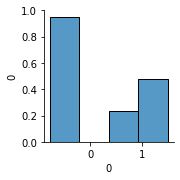

In [76]:
sns.pairplot(df_centre)

Text(0.5, 1.0, 'K with Elbow')

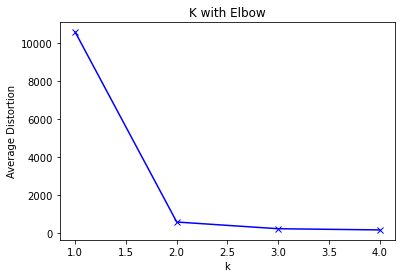

In [13]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('K with Elbow')

In [79]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.Collecting yellowbrick



C:\Users\smita.ezhava\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\smita.ezhava\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

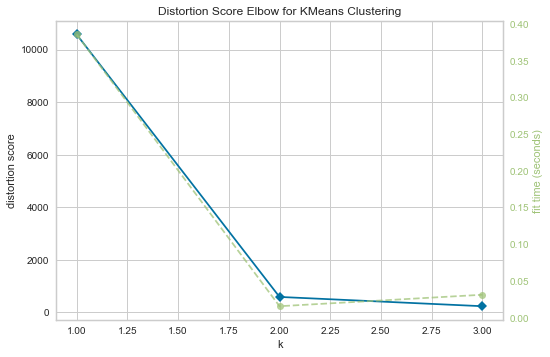

In [22]:
from yellowbrick.cluster import KElbowVisualizer
visual=KElbowVisualizer(KMeans(),k=(1,4))
visual.fit(stud_no_roll)
visual.show(outpath='elbowplot2.png') 

In [81]:
model1=KMeans(n_clusters=5)
model1.fit(tech_sup)
prediction1=model1.predict(tech_sup)
print(prediction1)

[1 2 1 2 1 0 0 1 4 0 0 3 1 0 4 4 3 1 0 4 3 3 3]


In [83]:
model1.labels_

array([1, 2, 1, 2, 1, 0, 0, 1, 4, 0, 0, 3, 1, 0, 4, 4, 3, 1, 0, 4, 3, 3,
       3])

In [84]:
tech_sup['group']=model1.labels_

In [85]:
tech_sup.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,group
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,1
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,2
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,1
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,2
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,1


In [86]:
tech_sup['problem_type']=tech['PROBLEM_TYPE']

In [88]:
tech_sup.head(10)

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,group,problem_type
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,1,Temperature control not working
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,2,power chord does not tightly fit
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,1,Fan swing not working
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,2,Main switch does not on
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,1,Forgot mobile app password
5,-0.631441,1.171694,1.198266,1.397818,-0.393024,0.822449,-0.822449,0,AC stops abruptly
6,-0.862176,2.108144,1.580322,-1.015573,-0.280732,0.822449,-0.822449,0,App hangs while entring commands
7,0.146467,-0.805257,-0.538351,-0.929380,-0.561463,0.685572,-0.685572,1,App takes a long time to initialize
8,1.174886,-1.013357,-1.007238,0.622085,-0.561463,-0.272563,0.272563,4,Unable to connect the App to the device
9,-0.796251,1.379794,1.337195,0.018738,-0.505317,0.685572,-0.685572,0,Reinstalling the app hangs the phone


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'Replace_percent'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[group]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

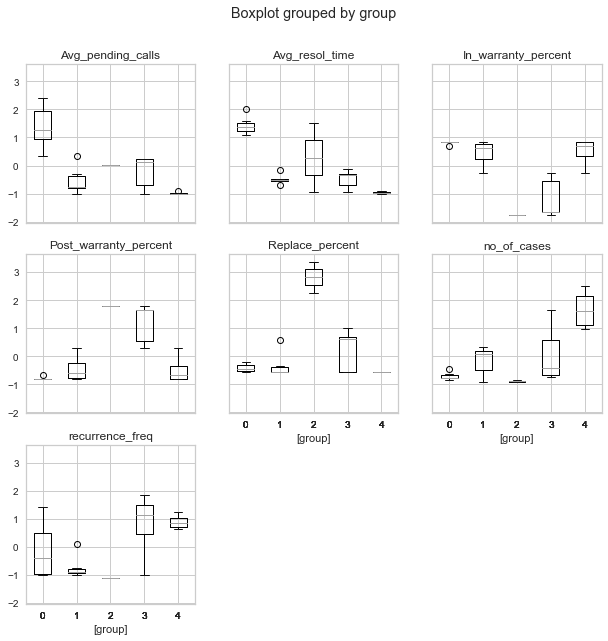

In [90]:
tech_sup.boxplot(by='group', figsize=(10,10))